<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura/blob/main/DataScience3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MACHINE LEARNING 11/01

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico

In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsores=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])


In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [ ]:
 #Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [ ]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

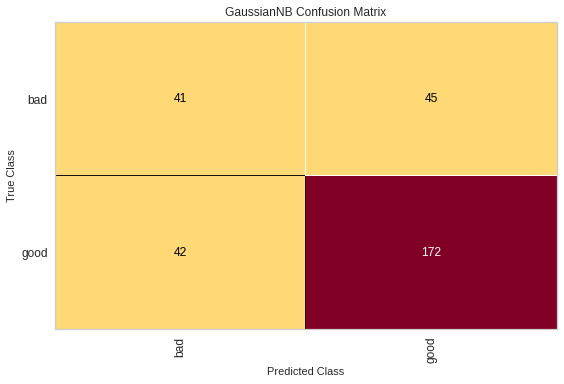

In [ ]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [ ]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape
#novo_credito

(1, 20)

In [ ]:
'''previsores=novo_credito.iloc[:,0:20].values #pegandos os previsores da classe
classe=novo_credito.iloc[:,20].values #classe em registro diferente'''

In [ ]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente o método "transform", pois a adaptação aos dados (fit) já foi feita anteriormente
#novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelEncoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelEncoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelEncoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelEncoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelEncoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelEncoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelEncoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelEncoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelEncoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelEncoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelEncoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelEncoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelEncoder13.transform(novo_credito[:, 19])

In [ ]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

In [ ]:
#arvore de decisao 12/01

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsores=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamentoA, X_teste, y_treinamentoA, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[1, 15, 0, ..., 2, 1, 1],
       [2, 36, 3, ..., 1, 0, 1],
       [0, 12, 4, ..., 1, 0, 1],
       ...,
       [1, 15, 1, ..., 1, 1, 1],
       [1, 24, 3, ..., 1, 0, 1],
       [1, 9, 1, ..., 2, 0, 1]], dtype=object)

In [ ]:

#modelo de treino com tree
arv=DecisionTreeClassifier()
arv.fit(X_treinamentoA,y_treinamentoA)

DecisionTreeClassifier()

In [ ]:
#exportacao da arv em .dot pra vizualizar
export_graphviz(arv, out_file='tree.dot')

In [ ]:
#previsoes
previsoe=arv.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [ ]:
#taxa de acerto
taxa_acerto2=accuracy_score(y_teste,previsoes)
taxa_acerto2

0.71

In [ ]:
#erro
taxa_erro=1- taxa_acerto2
taxa_erro

0.29000000000000004

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB #ultilizar naive bayse
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix , accuracy_score
from yellowbrick.classifier import ConfusionMatrix #forma da matrix em grafico
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


In [ ]:
credito=pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
pvs=credito.iloc[:,0:20].values
classe=credito.iloc[:,20].values

In [ ]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treino, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)
X_teste

array([[1, 15, 0, ..., 2, 1, 1],
       [2, 36, 3, ..., 1, 0, 1],
       [0, 12, 4, ..., 1, 0, 1],
       ...,
       [1, 15, 1, ..., 1, 1, 1],
       [1, 24, 3, ..., 1, 0, 1],
       [1, 9, 1, ..., 2, 0, 1]], dtype=object)

In [ ]:
#criacao do modelo de treinamento com vetor de suporte
svm=SVC()
svm.fit(X_treino,y_treinamento)

SVC()

In [ ]:
#previsoes de treino
previsores=svm.predict(X_treino)
previsores

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'g

In [ ]:
'''taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto'''

In [ ]:
forest= ExtraTreesClassifier()
forest.fit(X_treino, y_treinamento)
importancias= forest.feature_importances_
importancias

array([0.10279421, 0.0803875 , 0.0670761 , 0.0611044 , 0.0816487 ,
       0.05487028, 0.04996379, 0.05453965, 0.04344835, 0.02842405,
       0.04816835, 0.0462817 , 0.07072119, 0.0423491 , 0.03476832,
       0.03418078, 0.04014703, 0.02168586, 0.03124591, 0.00619471])

In [ ]:
X_treino=X_treino[:[0,1,2,3]]
X_teste

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , accuracy_score
from scipy import stats
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iristemp=pd.read_csv('iris.csv')
iristemp.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris=datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [ ]:
#organizou em nums as classe
#iris.data
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#indep é previsoreN , dep é a classe
previsoesN=iris.data 
classe=iris.target

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(previsoesN,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 1)
len(X_teste2)

45

In [ ]:
#mtd pra metodo olhar qntos vizinhos + proximos vai relacionar no modelo
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino2,y_treino2)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#45 previsoes dos registros
previsoesN=knn.predict(X_teste2)
previsoesN

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [ ]:
#matrix com o y_teste e previsoes #diag principal sao os acertos , houve 1 erro
confusaoN=confusion_matrix(y_teste2,previsoesN)
confusaoN

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [ ]:
#taxas de acerto e erro
taxa_acertoN = accuracy_score(y_teste2, previsoesN)
taxa_erroN = 1 - taxa_acertoN
taxa_acertoN

0.9777777777777777

In [ ]:
#ensamble learning com random forest
#gera varios modelos(trees conforme parametro definido) variando em termo de config , pra ver qual melhor votando pela performance

In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
creditorf = pd.read_csv('Credit.csv')
creditorf.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
previsoresrf = creditorf.iloc[:,0:20].values
classerf = creditorf.iloc[:,20].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsoresrf[:,0] = labelencoder.fit_transform(previsoresrf[:,0])
previsoresrf[:,2] = labelencoder.fit_transform(previsoresrf[:,2])
previsoresrf[:, 3] = labelencoder.fit_transform(previsoresrf[:, 3])
previsoresrf[:, 5] = labelencoder.fit_transform(previsoresrf[:, 5])
previsoresrf[:, 6] = labelencoder.fit_transform(previsoresrf[:, 6])
previsoresrf[:, 8] = labelencoder.fit_transform(previsoresrf[:, 8])
previsoresrf[:, 9] = labelencoder.fit_transform(previsoresrf[:, 9])
previsoresrf[:, 11] = labelencoder.fit_transform(previsoresrf[:, 11])
previsoresrf[:, 13] = labelencoder.fit_transform(previsoresrf[:, 13])
previsoresrf[:, 14] = labelencoder.fit_transform(previsoresrf[:, 14])
previsoresrf[:, 16] = labelencoder.fit_transform(previsoresrf[:, 16])
previsoresrf[:, 18] = labelencoder.fit_transform(previsoresrf[:, 18])
previsoresrf[:, 19] = labelencoder.fit_transform(previsoresrf[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinorf, X_testerf, y_treinorf, y_testerf = train_test_split(previsoresrf,
                                                                  classerf,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto,n_estimators num de arv aleatorias criadas
floresta = RandomForestClassifier(n_estimators = 20)
floresta.fit(X_treinorf, y_treinorf)

RandomForestClassifier(n_estimators=50)

In [ ]:
# Visualização dos atributos principais,ver tds as variacoes geradas
floresta.estimators_
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='auto', random_state=1661209425),
 DecisionTreeClassifier(max_features='auto', random_state=51720974),
 DecisionTreeClassifier(max_features='auto', random_state=698629682),
 DecisionTreeClassifier(max_features='auto', random_state=1254391408),
 DecisionTreeClassifier(max_features='auto', random_state=585904218),
 DecisionTreeClassifier(max_features='auto', random_state=1396742071),
 DecisionTreeClassifier(max_features='auto', random_state=296186212),
 DecisionTreeClassifier(max_features='auto', random_state=1650825386),
 DecisionTreeClassifier(max_features='auto', random_state=1591366532),
 DecisionTreeClassifier(max_features='auto', random_state=58187894),
 DecisionTreeClassifier(max_features='auto', random_state=616070370),
 DecisionTreeClassifier(max_features='auto', random_state=3419731),
 DecisionTreeClassifier(max_features='auto', random_state=2036027058),
 DecisionTreeClassifier(max_features='auto', random_state=1877483932),
 DecisionTreeClas

In [ ]:
previsoesrf = floresta.predict(X_testerf)
confusao = confusion_matrix(y_testerf, previsoesrf)
taxa_acertorf = accuracy_score(y_testerf, previsoesrf)
taxa_acertorf

0.7666666666666667

In [ ]:
#kmeans usa distancia euclidiana para agrupar usuarios , atraves de num de clusters previamente definido

In [ ]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Carregamento da base de dados 
iris = datasets.load_iris()
# visualização de quantos registros existem por classe,tarefa ñ supervisionada
unicosk, quantidadek = np.unique(iris.target, return_counts = True) #conta qtd de registros na classe
unicosk

array([0, 1, 2])

In [ ]:
quantidadek

array([50, 50, 50])

In [ ]:
# Agrupamento com k-means, utilizando 3 clusters (de acordo com a base de dados),define aq o num de clusters
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data) #ñ usa target

KMeans(n_clusters=3)

In [ ]:
# Visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# Visualização dos grupos que cada registro foi associado,ñ é previsao é agrupamento
previsoesk = cluster.labels_
previsoesk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# Contagem dos registros por classe
unicosk2, quantidadek2 = np.unique(previsoesk, return_counts = True)
unicosk2

array([0, 1, 2], dtype=int32)

In [ ]:
quantidadek2 #mudou agrupamento , ñ coincndo com classes reais

array([62, 50, 38])

In [ ]:
# Geração da matriz de contingência para comparar os grupos com a base de dados
resultadosk = confusion_matrix(iris.target, previsoesk)
resultadosk

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

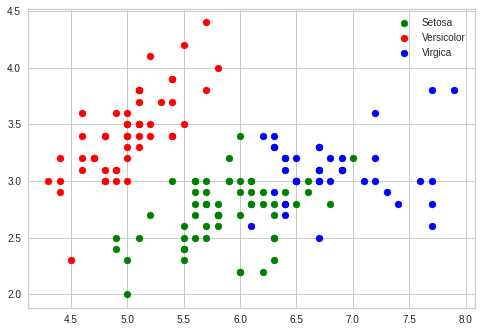

In [ ]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoesk == 0, 0], iris.data[previsoesk == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoesk == 1, 0], iris.data[previsoesk == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoesk == 2, 0], iris.data[previsoesk == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()

In [ ]:
#C-MEANS=define num de clusters e com dist de euclides ele associa elementos aos centros ajustando-os até forma definitiva 
#ñ atribui instancia absoluta ao cluster , atribuicao é proporcional(ex:70% ao cluster 1 etc)

In [86]:
!pip install -U scikit-fuzzy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=13fbed98c71f31620f3c897863c08893d06fe4767bf1d9f5033a818f9196169f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [87]:
 #Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import skfuzzy
#

In [89]:
# Carregamento da base de dados iris, que já está disponível no sklearn e coloca obj iris
iris = datasets.load_iris()

In [90]:
# Aplicação do algoritmo definindo três cluster (c = 3) e passando a matriz transposta (iris.data.T). Os outros parâmetros são obrigatórios e são os dc efault indicados na documentação
#tem q passar matrix transp pro cluster e c é o num de clusters
r = skfuzzy.cmeans(data = iris.data.T, c = 3, m = 2, error = 0.005,
                   maxiter = 1000, init = None) 

In [91]:
# Obtendo as porcentagens de um registros pertencer a um cluster, que está na posição 1 da matriz retornada
previsoes_porcentagem = r[1] #posicao 1 da pctg dos clusters

In [92]:
# Visualização da probabilidade de um registro pertencer a cada um dos cluster (o somatório é 1.0 que indica 100%)
for x in range(150):
  print( previsoes_porcentagem[0][x] ,previsoes_porcentagem[1][x] ,previsoes_porcentagem[2][x] )

0.996623648101864 0.0010718900492563868 0.0023044618488795563
0.9758344356432936 0.007502469072697833 0.016663095284008313
0.9798141251601632 0.006417500964095765 0.013768373875740958
0.9674034608869867 0.010113466099689057 0.022483073013324213
0.9944699230117076 0.0017678773798651556 0.003762199608427262
0.9345353843415768 0.02063001299044063 0.04483460266798255
0.9794794116376553 0.006507590200508871 0.014012998161835717
0.9995469331641795 0.00014128898194394932 0.0003117778538764827
0.9303341119314014 0.021913636722716248 0.04775225134588247
0.9827092969520647 0.005344991631333609 0.01194571141660178
0.9680254208587454 0.010205329165302354 0.02176924997595208
0.9921303838922019 0.0024328111235229154 0.005436804984275196
0.9706196151168373 0.009182261960349242 0.02019812292281361
0.9229284162421761 0.025246608093456243 0.051824975664367584
0.8897142945191054 0.03764507234263659 0.07264063313825804
0.841281951111997 0.054326045256094045 0.10439200363190888
0.9469013667746619 0.0175021

In [93]:
# Geração de matriz de contingência para comparação com as classes originais da base de dados
previsoes = previsoes_porcentagem.argmax(axis = 0)
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[50,  0,  0],
       [ 0,  3, 47],
       [ 0, 37, 13]])

In [94]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=9003e0b8787d0621e2a572ab2240acbe8333958ae7e3978e2c76213fdf9aab31
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [ ]:
#centros sao por pontos reais de dados

In [95]:
# Importação das bibliotecas
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
#pip install pyclustering (executar no Anaconda Prompt)

In [96]:
# Carregamento da base de dados
iris = datasets.load_iris()

In [98]:
# Configuração dos parâmetros do k-medoids, utilizando somente as duas primeiras colunas da base de dados por causa da visualização apenas
# 3, 12 e 20 são índices aleatórios de registros da base de dados (inicialização)
cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])#mdoids definidos , sao os indices dos registros
# Visualização dos pontos escolhidos (3, 12 e 20)
cluster.get_medoids()

[3, 12, 20]

In [99]:
# Aplicação do algoritmo para o agrupamento, obtenção dos grupo de cada registro e visualização dos medoides
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()
#lista de 3 elementos, com os indices dos registros do cluster cada lista é um cluster ,cada indice é um dado
previsoes

[[50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106]]

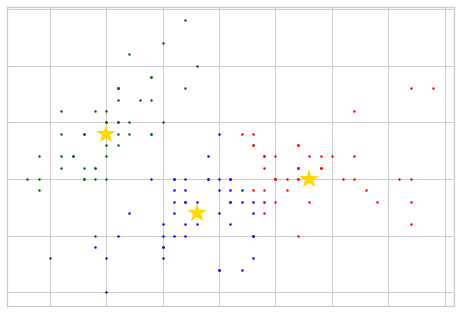

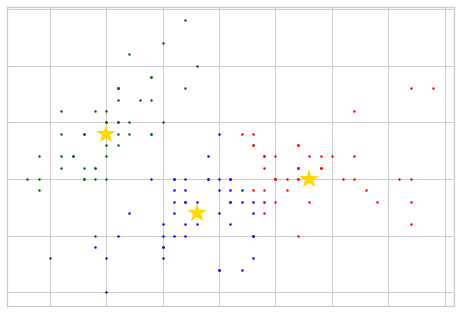

In [100]:
# Visualização do agrupamento, grafico do cluster com os centoids com tds os dados das 2 primeiras cols
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data = iris.data[:,0:2], marker = '*', markersize = 20)
v.show()

In [102]:
# Código para criar duas listas, uma com os grupos reais da base de dados e outra com os valores dos grupos
# Utilizado posteriormente para visualização da matriz de contingência==matrix de confusao
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
     for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])

In [103]:
# Geração da matriz de contingência, comparando os grupos reais com os grupos previstos
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])

In [ ]:
#REGRAS DE ASSOSIACAO

In [104]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=cd85a8be8cb1a2f6b50cb27552a0198616dc200931081f5cca186e5ed788ed58
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [105]:
# Importação das bibliotecas
import pandas as pd
from apyori import apriori
#pip install apyori (executar no Anaconda Prompt)

In [106]:
# Leitura das trasações 
dados = pd.read_csv('transacoes.txt', header = None)
dados

,0,1,2
0,Cerveja,Pizza,Sorvete
1,Pizza,Sorvete,NaN
2,Cerveja,Pizza,NaN
3,Cerveja,Pizza,Sorvete
4,Cerveja,Pizza,NaN
5,Pizza,NaN,NaN


In [107]:
#transformação para o formato de lista, que é exigido pela biblioteca apyori - 6 é a quantidade de itens na base de dados
#for pra add transacoes na lista
transacoes = []
for i in range(0,6):
    transacoes.append([str(dados.values[i,j]) for j in range(0,3)])
transacoes

[['Cerveja', 'Pizza', 'Sorvete'],
 ['Pizza', 'Sorvete', 'nan'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Cerveja', 'Pizza', 'Sorvete'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Pizza', 'nan', 'nan']]

In [109]:
# Execução do algoritmo apriori para geração das regras de associação, definindo os parâmetros de suporte e confiança
regras = apriori(transacoes, min_support = 0.5, min_confidence = 0.5,min_length=2) #valores dependem dos dados

In [110]:
# Criação de nova variável para armazenar somente as regras de associação
resultados = list(regras)
print(resultados[0])
resultados

RelationRecord(items=frozenset({'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)])


[RelationRecord(items=frozenset({'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Pizza'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Sorvete'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'nan'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Pizza', 'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza', 'Cerveja'}), confidence=0.6666666666666666, li

In [111]:
# Criação de nova variável, percorrendo a variável anterior para uma melhor visualização dos resultados
resultados2 = [list(x) for x in resultados]
resultados2

[[frozenset({'Cerveja'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Pizza'}),
  1.0,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]],
 [frozenset({'Sorvete'}),
  0.5,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]],
 [frozenset({'nan'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Cerveja', 'Pizza'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza', 'Cerveja'}), confidence=0.6666666666666666, lift=1.0),
   OrderedStatistic(items_base=frozenset({'Cerveja'}), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0),
   OrderedStatistic(items_base=frozenset({'Pizza'}), items_add=frozenset({'Cerveja'}), confi

In [112]:
# Criação de outra variável para a visualização das regras ficar mais fácil para o usuário, adicionando as regras encontradas na variável resultados2
resultados3 = []
for j in range(0,7):
    resultados3.append([list(x) for x in resultados2[j][2]])
resultados3 #aq vemos confianca e lift 

[[[frozenset(), frozenset({'Cerveja'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Pizza'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'Sorvete'}), 0.5, 1.0]],
 [[frozenset(), frozenset({'nan'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Cerveja', 'Pizza'}), 0.6666666666666666, 1.0],
  [frozenset({'Cerveja'}), frozenset({'Pizza'}), 1.0, 1.0],
  [frozenset({'Pizza'}), frozenset({'Cerveja'}), 0.6666666666666666, 1.0]],
 [[frozenset(), frozenset({'Pizza', 'Sorvete'}), 0.5, 1.0],
  [frozenset({'Pizza'}), frozenset({'Sorvete'}), 0.5, 1.0],
  [frozenset({'Sorvete'}), frozenset({'Pizza'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'Pizza', 'nan'}), 0.6666666666666666, 1.0],
  [frozenset({'Pizza'}), frozenset({'nan'}), 0.6666666666666666, 1.0],
  [frozenset({'nan'}), frozenset({'Pizza'}), 1.0, 1.0]]]

In [ ]:
#ECAT associador q mostra a frequencia dos itens

In [113]:
# Função pronta para o algoritmo ECLAT (atualmente o algoritmo não está disponível em uma biblioteca)
import os;
import sys;
import numpy as np;
import datetime as dt;
from numpy import linalg as LA;
import optparse;
import argparse;

In [114]:
# Global variable 
#containing all frequent patterns with its tid's
F =[];
# Time calculation
#start_time =0;
#end_time=0;

# Pattern class:
class Pattern:
	def __init__(self, item, tids):
		# list of item Id's in the pattern
		self.item_id = item;
		# tid of the pattern
		self.tid_list = tids;

	# union operation of item Id's for two patterns to get ID of candidate pattern
	def 	union_id(self,next_node):
		t = set(self.item_id);
		tt = set(next_node.item_id);
		new = t | tt;
		new_id = list(new);
		new_id.sort();
		return new_id;

    # intersection of tid's of two patterns to find tid of candidate pattern
	def 	intersec_tid_list(self,next_node):
		t = set(self.tid_list);
		tt = set(next_node.tid_list);
		new = t & tt;
		new_list = list(new);
		new_list.sort();
		return new_list;
	
	# returns support value for the pattern
	def	getSup(self):
		return len(self.tid_list);
	
	
#	def	compare(self,n):
#		if self.item_id == n.item_id:
#			return 1;
#		return 0;

	#Candidate generation & check for support	
	def	generate_check(self, n , minsup):
		
		# generating tid_list first
		temp_tid_list = self.intersec_tid_list(n);
		
		# if support for new candidate is >= minsup then only generate ID for that candidate		
		if len(temp_tid_list) >= minsup:
			temp_id = self.union_id(n);
			return (temp_id,temp_tid_list);
		else:
			return ([],[]);
	def	pattern_print(self):
		pattern_ID = str("");
		for i in self.item_id:
			pattern_ID = pattern_ID + str(i) + ' ';
		print(pattern_ID + '\t\t : ' + str(self.tid_list)); 
			
#End of Pattern class

In [ ]:
# Pattern Store class:
class PatternStore:
	def 	__init__(self):
		self.Pattern_list = [];
	
	# Add a whole group of pattern to the list
	def	addGroup(self,list_nodes):
		for n in list_nodes:
			self.Pattern_list.append(n);

	# Retursn i_th pattern from the list if available
	def	getNode(self,index):
		if index < len(self.Pattern_list):
			return self.Pattern_list[index];
		else:
			return [];
	
	# To Fallow DFS method: Recursive function is used - to calculate all frequent patterns from the 1st level frequent list
	def 	Eclat(self,minsup):
		for node in self.Pattern_list:
			F.append(node);
			new_P = PatternStore();
			# As all patterns are sorted initially get only next pattern from the current
			index = self.Pattern_list.index(node);
			i = index +1;
			n = self.getNode(i);
			
			while n:
				# Here I am doing 2 steps togather: 1- candidate generation & 2- checking for minsup
				(temp_id,temp_tid_list) = node.generate_check(n,minsup);
				# if temp_id is not empty				
				if temp_id:				
					new_P.Pattern_list.append(Pattern(temp_id,temp_tid_list));
				i = i +1;
				# get next node from the list
				n = self.getNode(i);
			# if any possible pattern child go to child first, DFS
			if new_P.Pattern_list:
				new_P.Eclat(minsup);

#End of PatternStore class

In [116]:
class DBReader:

	def	__init__(self,filetoread):
		self.file_id = filetoread;
	def	readFile(self):
		# stores each transaction
		self.trans=[];
		# stores no of items in each tansaction
		self.no_items = [];
		for	line	in	self.file_id:
			tuplex=line.split(" ");
			mylist=[];
			self.no_items.append(tuplex[0]);
			for	position	in	range(1,len(tuplex)):
				mylist.append(tuplex[position]);	
	
			self.trans.append(mylist);

	# From transactions: generate patterns and prepare a list
	def	genPatternList(self):
		#all items
		temp = [item for sublist in self.trans for item in sublist];

		#removing duplicates
		my_set = set(temp)
		self.items = list(my_set)

		#put in sorted oirder
		self.items.sort();
		
		# generate level_1 pattern list
		self.level_1 = [];

		# Start the timmer as candidate generation for level 1 is a part of Eclat algorithm.
		start_time = dt.datetime.now();		
		
		#generate all candidates for level 1
		for it in self.items:
			item = [];
			item.append(it)
			self.level_1.append(Pattern(item,[]));	
		
		# generate tid_list for every items in level 1 
		i=0;
		for t in self.trans:
			i = i + 1;
			t.sort();
			for it_id in t:
				index = self.items.index(it_id);
				self.level_1[index].tid_list.append(i);
	
		return start_time;

	# returns frequent patterns
	def	getFrequent(self,minsup):
		self.P = [];
		for n in self.level_1:
			c = int(n.getSup());
			if  c >= minsup:
				#print c;
				self.P.append(n);
		return self.P;

#End of DBReader class

In [117]:
def main(file, support):
	#printing flag
	p_flag = 1;

	#parser = optparse.OptionParser("usage: %prog [options] arg1 arg2")
	#parser.add_option("-f",  dest="filename", default="data.txt", type="string", help="specify filename to run on");
	#parser.add_option("-s",  dest="supnum", default=0, type="int", help="give minimun support to run on");
	#parser.add_option("-p",  dest="p", default=1, type="int");
	#(options, args) = parser.parse_args();

	parser = argparse.ArgumentParser();
	parser.add_argument("-f","--filename");
	parser.add_argument("-s","--supnum", type=int);
	parser.add_argument("-p", "--print_flag", action="store_true");
	args = parser.parse_args();
	
 
	#if	len(sys.argv) < 3:
	#	print('Please give me the filename &  minimum support value'+os.linesep);
	#	sys.exit(1);
	try:	
		#file name
		f_name = file;
		fileToRead=open(f_name);
		#fileToRead = open("data.txt");
		#Minimum Spport vlaue	
		minsup = support;
		# printing flag 
		if args.print_flag:
			p_flag = 1;	
	except(IOError,IndexError):
		print('Bad file name'+os.linesep);
		sys.exit(1);

	
	print('minsup = '+str(minsup));

	#minsup = 2;

	# DBReader object
	reader = DBReader(fileToRead);
	#reading the file
	reader.readFile();
	# Pattern generation for level 1 - It will return the starting time from when candidate generation is started.	
	start_time = reader.genPatternList();
	#print
	
	# Get frequent patterns from all candidates of level 1:
	level1_P = reader.getFrequent(minsup)

	#for n in level1_P:
	#	print n.item_id;
	#	print n.tid_list;

	#correct

	# Create Pattern Store object
	PttStr = PatternStore();
	
	# Add frequent patterns from level 1
	PttStr.addGroup(level1_P);

	# Eclat Algorithm
	PttStr.Eclat(minsup);
	
	end_time = dt.datetime.now();
	
	#print start_time;
	#print end_time;
		
	time = end_time - start_time;
	
	print('Computation time = '+ str(time.total_seconds()) + ' Seconds');
	
	if p_flag == 1:
		print('Pattern\t\t : Tid_List');	
		for n in F:
			n.pattern_print();

#End of main function

In [ ]:
# Geração dos itens frequentes, APRESENTANDO ERRO
#if	__name__== "__main__":
	#main('transacoes2.txt', 3);